An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.



Fields
The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: 50K
Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
data=pd.read_csv("/content/drive/Shareddrives/mayur/innomatics/EDA/adult.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.shape

(48842, 15)

In [4]:
data.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


* Age and educational column is almost normally distributed.

In [5]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

**Numerical columns**

In [6]:
print(data.select_dtypes(include=['int','float']).columns)
len(data.select_dtypes(include=['int','float']).columns)

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


6

**Categorical columns**

In [7]:
print(data.select_dtypes(include=['object']).columns)
len(data.select_dtypes(include=['object']).columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


9

In [8]:
col=data.select_dtypes(include=['object']).columns

for i in col:
  print(data[i].value_counts(),"\n")

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64 

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64 

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64 

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical      

**Rearrange data**

In [9]:
data.replace(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married','Separated','Widowed'],
['not married','married','married','married','not married','not married','not married'], inplace = True)

data.replace(['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov','State-gov','Without-pay', 'Never-worked'],
['Private','inc','inc','gov','gov','gov','Without-pay','Never-worked'], inplace = True)

### Data cleaning

In [10]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [11]:
data.isin(["?"]).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [12]:
# Delete the incomplte data
data = data[data["workclass"] != "?"] 
data=data[data["occupation"] != "?"] 
data=data[data["native-country"] != "?"]
data.shape

(45222, 15)

## Data visualization

### Univariate Analysis

Detecting outlier using Z score

In [13]:
def detect_outliers(data):
    outliers=[]
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

**age**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


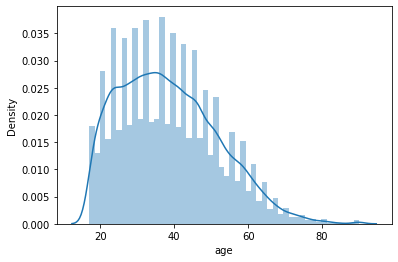

In [14]:
sns.distplot(data['age'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f65829e9950>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6579ce0910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6579cea950>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6579cea410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f65829e9e50>,
  <matplotlib.lines.Line2D at 0x7f6579ce03d0>]}

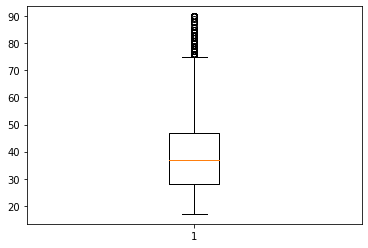

In [15]:
plt.boxplot(data['age'])

* outliers present at upper tail

In [16]:
outliers_age=detect_outliers(data['age'])
print("outliers:",outliers_age)
print("Number of outliers:",len(outliers_age))

outliers: [80, 90, 80, 81, 82, 81, 85, 80, 90, 81, 89, 83, 81, 82, 80, 90, 81, 83, 90, 90, 80, 80, 81, 90, 85, 90, 81, 81, 80, 79, 81, 80, 88, 87, 90, 79, 83, 79, 80, 79, 81, 81, 90, 82, 90, 81, 88, 80, 81, 80, 81, 90, 84, 80, 80, 83, 79, 79, 90, 81, 90, 88, 90, 90, 80, 90, 81, 81, 80, 90, 79, 81, 90, 90, 80, 90, 90, 79, 79, 84, 90, 80, 90, 81, 83, 84, 79, 85, 82, 79, 90, 90, 84, 80, 90, 90, 84, 90, 90, 90, 81, 82, 81, 80, 90, 80, 84, 82, 79, 90, 84, 90, 83, 80, 79, 80, 79, 80, 90, 90, 90, 81, 83, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 79, 81, 88, 90, 82, 88, 83, 79, 86, 90, 82, 83, 81, 79, 84, 84, 79, 90, 80, 81, 81, 90, 80, 82, 90, 90, 85]
Number of outliers: 163


* 163 outliers are present in age at upper bound.

In [17]:
outliers_age=detect_outliers(data['age'])

print("Number of outliers:",len(outliers_age))

Number of outliers: 163


##### **Outliers treatment**

In [18]:
# upper bound outliers replace by 95th percentile values.
data['age']=np.clip(data['age'],a_min=None,a_max = data['age'].quantile(0.95))

In [19]:
# Find number of outliers in train set.
outliers_age=detect_outliers(data['age'])

print("Number of outliers:",len(outliers_age))

Number of outliers: 0


**fnlwgt**

{'boxes': [<matplotlib.lines.Line2D at 0x7f6579c6ae90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6579c72e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6579c79ed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6579c79990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6579c72410>,
  <matplotlib.lines.Line2D at 0x7f6579c72950>]}

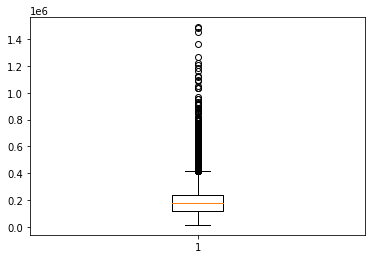

In [20]:
plt.boxplot(data['fnlwgt'])

* outliers present at upper tail

In [21]:
outliers_fnlwgt=detect_outliers(data['fnlwgt'])
print("outliers:",outliers_fnlwgt)
print("Number of outliers:",len(outliers_fnlwgt))

outliers: [537222, 512864, 599057, 542610, 652784, 573446, 662460, 629900, 509364, 632733, 560313, 651702, 644278, 535852, 581128, 608881, 914061, 624006, 510072, 593246, 714597, 816750, 552529, 575172, 622192, 566066, 614113, 548568, 789600, 864960, 723746, 692831, 535869, 638116, 698039, 677398, 547931, 666014, 765214, 761800, 1047822, 544319, 617917, 522881, 750972, 589155, 538193, 588739, 588484, 806552, 858091, 663291, 581025, 656488, 557349, 655066, 737315, 541755, 594521, 589838, 605504, 558752, 772919, 884434, 604045, 697806, 632271, 587310, 538243, 1490400, 764638, 718736, 882849, 746660, 786418, 565313, 653215, 576645, 510643, 538099, 539019, 531055, 594187, 685955, 548361, 606111, 592029, 513977, 647591, 566066, 553588, 624572, 535740, 607118, 580591, 557853, 635913, 557805, 626493, 914061, 557349, 953588, 558344, 590204, 679853, 535762, 814850, 874728, 506830, 594194, 538583, 602513, 589809, 507492, 546118, 530099, 1117718, 849067, 590941, 572285, 608441, 720428, 557359, 59

* 471 outliers are present in age at upper bound.

##### **Outliers treatment**

In [22]:
# upper bound outliers replace by 95th percentile values.
data['fnlwgt']=np.clip(data['fnlwgt'],a_min=None,a_max = data['fnlwgt'].quantile(0.95))

In [23]:
# Find number of outliers in train set.
outliers_fnlwgt=detect_outliers(data['fnlwgt'])

print("Number of outliers:",len(outliers_fnlwgt))

Number of outliers: 0


* All outliers are removed and replaced.

**educational-num**

{'boxes': [<matplotlib.lines.Line2D at 0x7f6579bf33d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6579bfa3d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6579c01410>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6579bfae90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6579bf3910>,
  <matplotlib.lines.Line2D at 0x7f6579bf3e50>]}

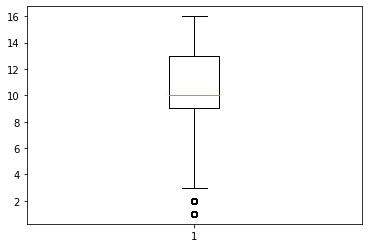

In [24]:
plt.boxplot(data['educational-num'])

* outliers present at lower bound.

In [25]:
outliers_educational=detect_outliers(data['educational-num'])
print("outliers:",outliers_educational)
print("Number of outliers:",len(outliers_educational))

outliers: [2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1]
Number of outliers: 294


* 294 outliers are present in educational-num at upper bound.

##### **Outliers treatment**

In [26]:
# lower bound outliers replace by 5th percentile values.
data['educational-num']=np.clip(data['educational-num'],a_min=data['educational-num'].quantile(0.05),a_max = None)

In [27]:
# Find number of outliers in train set.
outliers_educational=detect_outliers(data['educational-num'])

print("Number of outliers:",len(outliers_educational))

Number of outliers: 0


* All outliers are removed and replaced.

**capital-gain**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


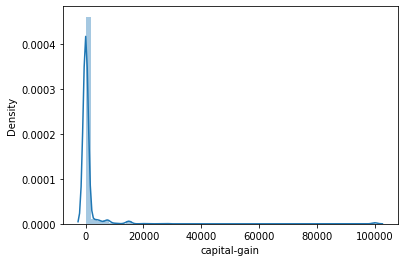

In [28]:
sns.distplot(data['capital-gain'])

**educational-num**

{'boxes': [<matplotlib.lines.Line2D at 0x7f6579ad0450>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6579ad5450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6579a5d490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6579ad5f10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6579ad0990>,
  <matplotlib.lines.Line2D at 0x7f6579ad0ed0>]}

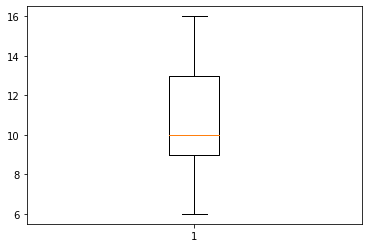

In [29]:
plt.boxplot(data['educational-num'])

* No outliers are present.

**capital-loss**

{'boxes': [<matplotlib.lines.Line2D at 0x7f6579a32f50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6579a3bf50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6579a42f90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6579a42a50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6579a3b4d0>,
  <matplotlib.lines.Line2D at 0x7f6579a3ba10>]}

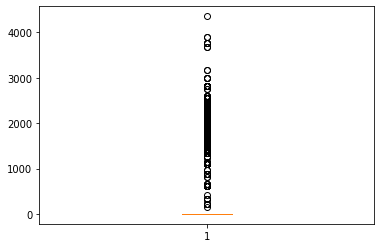

In [30]:
plt.boxplot(data['capital-loss'])

* outliers present at upper bound.

In [31]:
outliers_capitalloss=detect_outliers(data['capital-loss'])
print("outliers:",outliers_capitalloss)
print("Number of outliers:",len(outliers_capitalloss))

outliers: [1721, 1876, 2415, 1887, 1887, 1887, 1887, 1977, 2057, 1429, 1590, 2057, 1721, 1887, 1485, 1485, 1977, 1887, 1721, 2051, 2377, 1672, 1628, 1902, 1902, 1590, 1977, 1741, 1887, 2444, 1876, 1902, 1408, 1902, 2001, 2001, 2415, 2042, 1740, 1876, 1825, 1902, 1887, 1977, 1887, 1902, 1887, 1902, 2415, 1848, 1719, 3004, 1590, 1977, 1887, 1977, 2001, 1902, 1977, 2179, 1902, 1573, 1429, 2205, 1977, 2339, 1887, 2339, 1726, 2258, 1672, 1590, 1887, 1340, 2415, 1504, 1887, 2415, 2559, 1977, 1848, 2258, 1902, 1887, 1668, 1974, 1977, 1741, 1980, 2051, 2377, 1902, 2444, 1564, 1408, 1902, 1977, 2547, 1902, 2002, 2057, 2001, 1977, 1977, 1628, 1902, 1876, 1848, 1719, 1669, 1902, 1902, 2339, 1902, 2339, 1902, 1887, 1902, 1887, 1429, 2001, 1485, 1902, 1980, 1504, 1887, 1902, 1977, 1617, 1741, 2051, 1980, 1902, 1887, 2205, 1602, 1573, 1977, 2415, 3175, 1668, 2472, 1669, 2057, 1504, 1902, 1902, 1579, 1902, 1741, 1902, 1902, 1579, 1590, 1977, 1848, 1977, 2444, 1719, 1485, 1590, 1887, 2179, 2415, 1902,

* 2077 outliers are present in capital loss at upper bound.

##### **Outliers treatment**

In [32]:
# upper bound outliers replace by 95th percentile values.
data['capital-loss']=np.clip(data['capital-loss'],a_min=None,a_max = data['capital-loss'].quantile(0.95))

In [33]:
def Winsorization_outliers(df):
  out=[]
  q1 = np.percentile(df , 1)
  q3 = np.percentile(df , 99)
  for i in df:
    if i > q3 or i < q1:
      out.append(i)
  print("Outliers:",out)
  
Winsorization_outliers(data['capital-loss'])

Outliers: []


* All outliers are removed and replaced.

**hours-per-week**

{'boxes': [<matplotlib.lines.Line2D at 0x7f65799bb910>],
 'caps': [<matplotlib.lines.Line2D at 0x7f65799bf910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f65799c5950>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f65799c5410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f65799bbe50>,
  <matplotlib.lines.Line2D at 0x7f65799bf3d0>]}

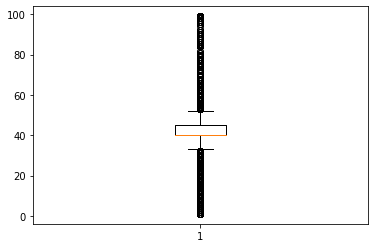

In [34]:
plt.boxplot(data['hours-per-week'])

* outliers present at upper bound and lower bound.

In [35]:
outliers_hoursperweek=detect_outliers(data['hours-per-week'])
print("outliers:",outliers_hoursperweek)
print("Number of outliers:",len(outliers_hoursperweek))

outliers: [90, 84, 80, 84, 80, 99, 80, 80, 96, 90, 3, 1, 99, 80, 80, 84, 99, 2, 4, 78, 80, 99, 84, 80, 3, 80, 80, 80, 99, 92, 3, 80, 84, 77, 99, 80, 84, 85, 4, 99, 4, 2, 84, 80, 99, 98, 84, 77, 96, 4, 80, 90, 4, 78, 84, 80, 90, 80, 86, 80, 4, 84, 80, 99, 80, 85, 80, 80, 80, 80, 3, 4, 80, 84, 99, 4, 80, 84, 99, 99, 99, 99, 90, 80, 96, 2, 99, 99, 90, 99, 80, 88, 2, 80, 80, 90, 79, 4, 4, 78, 84, 2, 80, 84, 3, 4, 1, 84, 99, 89, 98, 80, 80, 90, 4, 80, 99, 80, 78, 99, 99, 80, 80, 80, 99, 80, 99, 99, 80, 80, 90, 80, 78, 84, 3, 80, 80, 1, 99, 99, 99, 80, 99, 88, 3, 4, 90, 80, 85, 84, 4, 3, 98, 80, 99, 80, 4, 99, 99, 1, 4, 99, 96, 84, 99, 80, 1, 77, 99, 99, 99, 84, 90, 2, 99, 99, 3, 85, 99, 3, 99, 80, 80, 99, 2, 99, 80, 4, 80, 99, 99, 80, 2, 80, 86, 80, 3, 80, 2, 84, 80, 80, 84, 80, 84, 4, 4, 80, 80, 80, 99, 80, 90, 4, 84, 92, 80, 80, 80, 84, 84, 80, 90, 80, 80, 80, 2, 1, 98, 80, 80, 80, 99, 80, 80, 99, 80, 80, 78, 90, 80, 80, 90, 84, 99, 80, 90, 84, 3, 98, 80, 85, 84, 80, 3, 84, 99, 80, 84, 84

* 626 outliers are present in capital loss at upper bound.

##### **Outliers treatment**

In [36]:
# upper bound outliers replace by 95th percentile values.
data['hours-per-week']=np.clip(data['hours-per-week'],a_min=data['hours-per-week'].quantile(0.05),a_max = data['hours-per-week'].quantile(0.95))

In [37]:
outliers_hoursperweek=detect_outliers(data['hours-per-week'])

print("Number of outliers:",len(outliers_hoursperweek))

Number of outliers: 0


* All outliers are removed and replaced.

### Bivariate Analysis

## Model Building

In [38]:
X=data.iloc[:, :14]
y=data.iloc[:,-1]

In [39]:
y.value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

### Normalization

In [40]:
#MinMax scaler
columns=X.select_dtypes(include=['int','float']).columns

for column in columns:
  if column!="income":
    X[column]=X.loc[:, [column]].apply(lambda X: (X - X.min()) / (X.max()- X.min()))

In [41]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)


In [42]:
#One hot encoding
columns=['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country']

from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
for i in columns:
  X[i]=le.fit_transform(X[i])

In [43]:
X=X.drop(['capital-loss'],axis=1)
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,hours-per-week,native-country
0,0.177778,0,0.582766,1,0.1,1,6,3,2,1,0.000000,0.50,38
1,0.466667,0,0.208513,11,0.3,0,4,0,4,1,0.000000,0.75,38
2,0.244444,2,0.883695,7,0.6,0,10,0,4,1,0.000000,0.50,38
3,0.600000,0,0.401145,15,0.4,0,6,0,2,1,0.076881,0.50,38
5,0.377778,0,0.505972,0,0.0,1,7,1,4,1,0.000000,0.25,38


### Implement Machine Learning Models

#### Logistic Regression

Applying Logistic Regression with L1 regularization 

In [48]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_1, y_1, test_size=0.3)

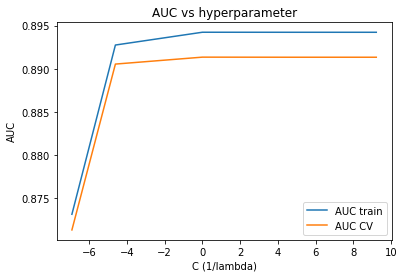

optimal lambda for which auc is maximum :  1


In [46]:
scalar = StandardScaler(with_mean=False)
X_train = scalar.fit_transform(X_train)
X_test= scalar.transform(X_test)
X_cv=scalar.transform(X_cv)

C = [10**-3, 10**-2, 10**0, 10**2,10**3,10**4]#C=1/lambda
auc_train=[]
auc_cv=[]
for c in C:
    lr=LogisticRegression(penalty='l1',C=c,solver='saga')
    lr.fit(X_train,y_train)
    probcv=lr.predict_proba(X_cv)[:,1]
    auc_cv.append(roc_auc_score(y_cv,probcv))
    probtr=lr.predict_proba(X_train)[:,1]
    auc_train.append(roc_auc_score(y_train,probtr))
optimal_c= C[auc_cv.index(max(auc_cv))]
C=[math.log(x) for x in C]#converting values of C into logarithm
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(C, auc_train, label='AUC train')
ax.plot(C, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('C (1/lambda)')
plt.ylabel('AUC')
ax.legend()
plt.show()
print('optimal lambda for which auc is maximum : ',1//optimal_c)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


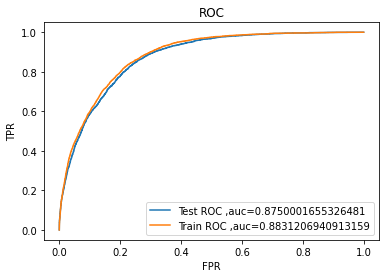

In [50]:
#ROC for lambda=1
from sklearn import metrics
lr=LogisticRegression(penalty='l1',C=0.1,solver='saga')
lr.fit(X_train,y_train)
predi=lr.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=lr.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

* Train=88.312
* Test=87.500

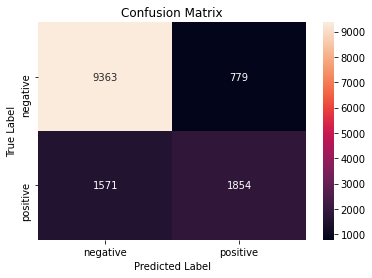

In [55]:
#Confusion matrix using heatmap for test data
from sklearn.metrics import confusion_matrix
lr=LogisticRegression(penalty='l1',C=optimal_c,solver='saga')
lr.fit(X_train,y_train)
predic=lr.predict(X_test)
import seaborn as sns
conf_mat = confusion_matrix(y_test, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Applying Logistic Regression with L2 regularization 

In [52]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

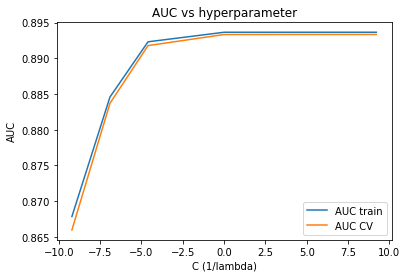

optimal lambda for which auc is maximum :  0


In [53]:
scalar = StandardScaler(with_mean=False)
X_train = scalar.fit_transform(X_train)
X_test= scalar.transform(X_test)
X_cv=scalar.transform(X_cv)
C = [10**-4,10**-3, 10**-2, 10**0, 10**2,10**3,10**4]#C=1/lambda
auc_train=[]
auc_cv=[]
for c in C:
    lr=LogisticRegression(penalty='l2',C=c)
    lr.fit(X_train,y_train)
    probcv=lr.predict_proba(X_cv)[:,1]
    auc_cv.append(roc_auc_score(y_cv,probcv))
    probtr=lr.predict_proba(X_train)[:,1]
    auc_train.append(roc_auc_score(y_train,probtr))
optimal_c= C[auc_cv.index(max(auc_cv))]
C=[math.log(x) for x in C]#converting values of C into logarithm
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(C, auc_train, label='AUC train')
ax.plot(C, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('C (1/lambda)')
plt.ylabel('AUC')
ax.legend()
plt.show()
print('optimal lambda for which auc is maximum : ',1//optimal_c)

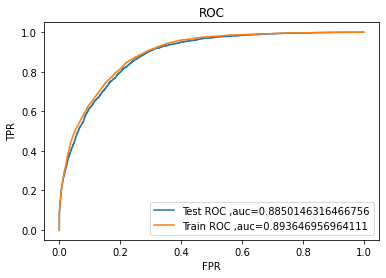

In [56]:
#ROC for lambda=0
lr=LogisticRegression(penalty='l2',C=optimal_c)
lr.fit(X_train,y_train)
predi=lr.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=lr.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

* Train=89.364
* Test=88.501

#### SVM

##### Applying Linear SVM

In [57]:
#Splitting preprocessed reviews into train,cross validation and test
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

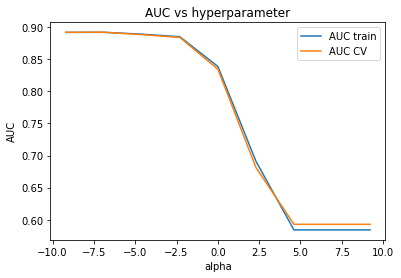

optimal alpha for which auc is maximum :  0.001


In [58]:
scalar = StandardScaler(with_mean=False)
X_train = scalar.fit_transform(X_train)
X_test= scalar.transform(X_test)
X_cv=scalar.transform(X_cv)

alpha = [10**-4, 10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]#alpha=1/C
auc_train=[]
auc_cv=[]
for a in alpha:
    model=SGDClassifier(alpha=a) #loss default hinge
    svm=CalibratedClassifierCV(model, cv=3) #calibrated classifier cv for calculation of predic_proba
    svm.fit(X_train,y_train)
    probcv=svm.predict_proba(X_cv)[:,1]
    auc_cv.append(roc_auc_score(y_cv,probcv))
    probtr=svm.predict_proba(X_train)[:,1]
    auc_train.append(roc_auc_score(y_train,probtr))
optimal_alpha= alpha[auc_cv.index(max(auc_cv))]
alpha=[math.log(x) for x in alpha]#converting values of alpha into logarithm
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(alpha, auc_train, label='AUC train')
ax.plot(alpha, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('alpha')
plt.ylabel('AUC')
ax.legend()
plt.show()
print('optimal alpha for which auc is maximum : ',optimal_alpha)

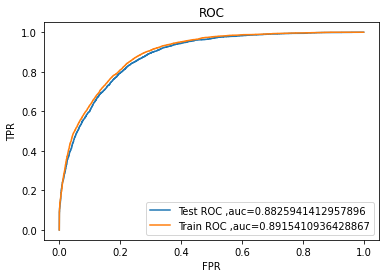

In [61]:

#training our model for alpha=0.001
#ROC curve
model=SGDClassifier(alpha=0.001)
svm=CalibratedClassifierCV(model, cv=3)
svm.fit(X_train,y_train)
predi=svm.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=svm.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

* Train=88.154
*Test=88.259

### Applying Decision Trees

In [62]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

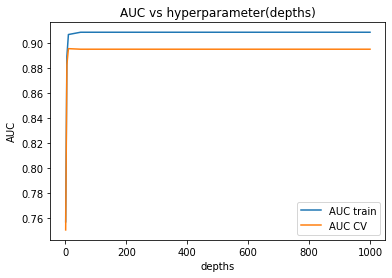

optimal depth for which auc is maximum :  10
optimal minimum samples split for which auc is maximum :  500


In [63]:
scalar = StandardScaler(with_mean=False)
X_train = scalar.fit_transform(X_train)
X_test= scalar.transform(X_test)
X_cv=scalar.transform(X_cv)

depths=[1,5,10,50,100,500,1000]
best_m=[]
min_samples=[2,5,10,15,100,500]
auc_train=[]
auc_cv=[]
for d in depths:
    ms,rc=0,0
    for m in min_samples:
        dt=DecisionTreeClassifier(max_depth=d,min_samples_split=m)
        dt.fit(X_train,y_train)
        probc=dt.predict_proba(X_cv)[:,1]
        val=roc_auc_score(y_cv,probc)
        if val>rc:
            rc=val
            ms=m
    dt=DecisionTreeClassifier(max_depth=d,min_samples_split=ms)
    dt.fit(X_train,y_train)
    probcv=dt.predict_proba(X_cv)[:,1]
    auc_cv.append(roc_auc_score(y_cv,probcv))
    best_m.append(ms)
    probtr=dt.predict_proba(X_train)[:,1]
    auc_train.append(roc_auc_score(y_train,probtr))

        
        
    
optimal_depth= depths[auc_cv.index(max(auc_cv))]
optimal_min_samples_split=best_m[auc_cv.index(max(auc_cv))]

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(depths, auc_train, label='AUC train')
ax.plot(depths, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter(depths)')
plt.xlabel('depths')
plt.ylabel('AUC')
ax.legend()
plt.show()
print('optimal depth for which auc is maximum : ',optimal_depth)
print('optimal minimum samples split for which auc is maximum : ',optimal_min_samples_split)

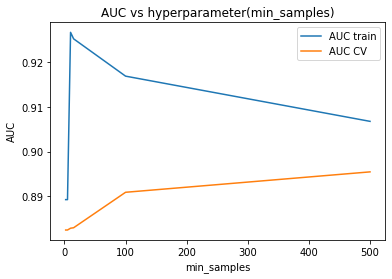

In [66]:
auc_train_m=[]
auc_cv_m=[]
for m in min_samples:
    dp,rc=0,0
    for d in depths:
        dt=DecisionTreeClassifier(max_depth=d,min_samples_split=m)
        dt.fit(X_train,y_train)
        probc=dt.predict_proba(X_cv)[:,1]
        val=roc_auc_score(y_cv,probc)
        if val>rc:
            rc=val
            dp=d
    dt=DecisionTreeClassifier(max_depth=dp,min_samples_split=m)
    dt.fit(X_train,y_train)
    probcv=dt.predict_proba(X_cv)[:,1]
    auc_cv_m.append(roc_auc_score(y_cv,probcv))
    best_m.append(ms)
    probtr=dt.predict_proba(X_train)[:,1]
    auc_train_m.append(roc_auc_score(y_train,probtr))

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(min_samples, auc_train_m, label='AUC train')
ax.plot(min_samples, auc_cv_m, label='AUC CV')
plt.title('AUC vs hyperparameter(min_samples)')
plt.xlabel('min_samples')
plt.ylabel('AUC')
ax.legend()
plt.show()

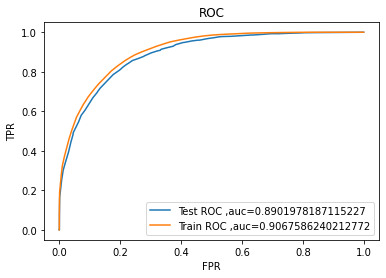

In [67]:
#training our model for max_depth=10,min_samples_split=500
#ROC curve
dt=DecisionTreeClassifier(max_depth=10,min_samples_split=500)
dt.fit(X_train,y_train)
predi=dt.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=dt.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

* Train=90.675
* Test=89.019

### GBDT 

##### Applying RF

In [68]:
#Splitting preprocessed reviews into train,cross validation and test
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [69]:
scalar = StandardScaler(with_mean=False)
X_train = scalar.fit_transform(X_train)
X_test= scalar.transform(X_test)
X_cv=scalar.transform(X_cv)


base_learners = [20,40,60,80,100,120]
depths=[1,5,10,50,100,500,1000]
param_grid={'n_estimators': base_learners, 'max_depth':depths}
rf = RandomForestClassifier(max_features='sqrt')
model=GridSearchCV(rf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(X_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal n_estimators 80
optimal max_depth 10


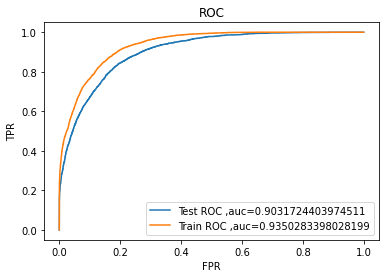

In [70]:
rf=RandomForestClassifier(max_features='sqrt',max_depth=10,n_estimators=80)
rf.fit(X_train,y_train)
predi=rf.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=rf.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

* Train=93.502
* Test=90.317

##### Applying XGBOOST

optimal depth :  5
optimal n_estimator :  120


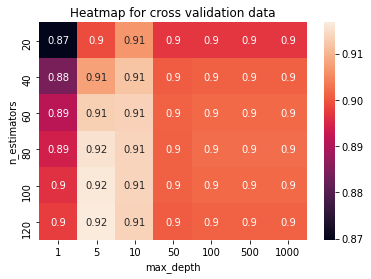

In [73]:
from xgboost import XGBClassifier

scalar = StandardScaler(with_mean=False)
X_train = scalar.fit_transform(X_train)
X_test= scalar.transform(X_test)
X_cv=scalar.transform(X_cv)

base_learners = [20,40,60,80,100,120]
depths=[1,5,10,50,100,500,1000]

import seaborn as sns
X=[]
Y=[]
Z=[]
Zt=[]
for bl in base_learners:
    for d in depths:
        gbdt=XGBClassifier(booster='gbtree' ,max_depth=d,n_estimators=bl)
        
        gbdt.fit(X_train,y_train)
        pred=gbdt.predict_proba(X_cv)[:,1]
        predt=gbdt.predict_proba(X_train)[:,1]
        X.append(bl)
        Y.append(d)
        Z.append(roc_auc_score(y_cv,pred))
        Zt.append(roc_auc_score(y_train,predt))
optimal_depth=Y[Z.index(max(Z))]   
optimal_n_estimator=X[Z.index(max(Z))]

print('optimal depth : ',optimal_depth)
print('optimal n_estimator : ',optimal_n_estimator)
        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': Z})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

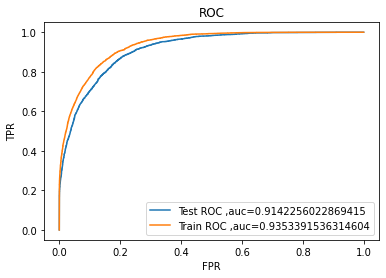

In [74]:
gbdt=XGBClassifier(booster='gbtree' ,max_depth=optimal_depth,n_estimators=optimal_n_estimator)
gbdt.fit(X_train,y_train)
predi=gbdt.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=gbdt.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

* Train=93.539
* Test=91.422

### Naive Bayes

In [75]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB

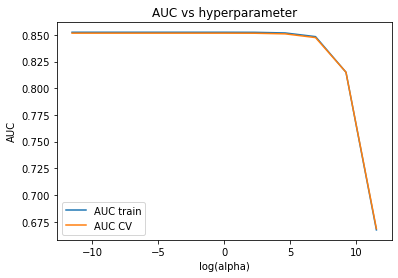

optimal alpha for which auc is maximum :  0.001


In [78]:

scalar = StandardScaler(with_mean=False)
X_train = scalar.fit_transform(X_train)
X_test= scalar.transform(X_test)
X_cv=scalar.transform(X_cv)

auc_train=[]
auc_cv=[]
alpha_values = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]#alpha from 10^-5 to 10^5
    
for i in alpha_values:
    mnb = MultinomialNB(alpha = i)
    mnb.fit(X_train,y_train)
    pred=mnb.predict_proba(X_cv)[:,1]
    pred1=mnb.predict_proba(X_train)[:,1]
    auc_train.append(roc_auc_score(y_train,pred1))
    auc_cv.append(roc_auc_score(y_cv,pred))
    
optimal_alpha= alpha_values[auc_cv.index(max(auc_cv))]
alpha_values=[math.log(x) for x in alpha_values]
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(alpha_values, auc_train, label='AUC train')
ax.plot(alpha_values, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('log(alpha)')
plt.ylabel('AUC')
ax.legend()
plt.show()
print('optimal alpha for which auc is maximum : ',optimal_alpha)

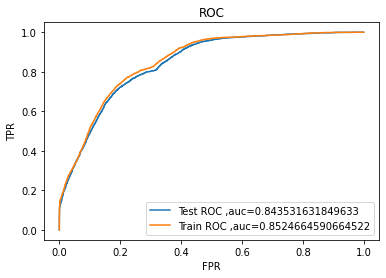

In [79]:
#ROC for alpha =0.001
mnb=MultinomialNB(alpha = 0.001)
mnb.fit(X_train,y_train)
predi=mnb.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=mnb.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

* Train=85.246
* Test=84.351

### ANN

In [85]:
from  keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,BatchNormalization

model = Sequential()

In [94]:
# Block-1

model.add(Dense(units=14, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=14, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


# Block-2
model.add(Dense(units=50, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=50, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

## Block-3

model.add(Dense(units=1, activation='sigmoid'))


In [95]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [96]:
model.fit(X_train, y_train, batch_size = 100, epochs = 1000)

Epoch 1/1000
222/222 [==============================] - 11s 11ms/step - loss: 0.4976 - accuracy: 0.7806
Epoch 2/1000
222/222 [==============================] - 2s 11ms/step - loss: 0.3608 - accuracy: 0.8310
Epoch 3/1000
222/222 [==============================] - 2s 11ms/step - loss: 0.3550 - accuracy: 0.8306
Epoch 4/1000
222/222 [==============================] - 2s 11ms/step - loss: 0.3388 - accuracy: 0.8399
Epoch 5/1000
222/222 [==============================] - 2s 11ms/step - loss: 0.3322 - accuracy: 0.8395
Epoch 6/1000
222/222 [==============================] - 2s 11ms/step - loss: 0.3381 - accuracy: 0.8392
Epoch 7/1000
222/222 [==============================] - 2s 11ms/step - loss: 0.3392 - accuracy: 0.8399
Epoch 8/1000
222/222 [==============================] - 2s 11ms/step - loss: 0.3300 - accuracy: 0.8435
Epoch 9/1000
222/222 [==============================] - 2s 11ms/step - loss: 0.3325 - accuracy: 0.8422
Epoch 10/1000
222/222 [==============================] - 2s 11ms/step - 

In [99]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9786  356]
 [2018 1407]]


0.8250165843591066

* Accuracy=82%